<a href="https://colab.research.google.com/github/godineanvesh/parameters/blob/main/parameters_setting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
pip install dtreeplt

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from dtreeplt import dtreeplt
from sklearn import metrics
import numpy as np

In [29]:
pima = pd.read_csv("https://github.com/SavioSal/datasets/raw/master/diabetes.csv")

In [30]:
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [31]:
x = pima.iloc[:,range(0,8)]

In [32]:
y = pima.Outcome

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 1)

In [34]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [35]:
dtclf = DecisionTreeClassifier(criterion="entropy")

In [36]:
dtmodel = dtclf.fit(x_train,y_train)

In [66]:
dtmodel.set_params(max_depth = 4, max_features = 4, max_leaf_nodes = 6)
dtmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 4,
 'max_leaf_nodes': 6,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [37]:
y_pred = dtmodel.predict(x_test)

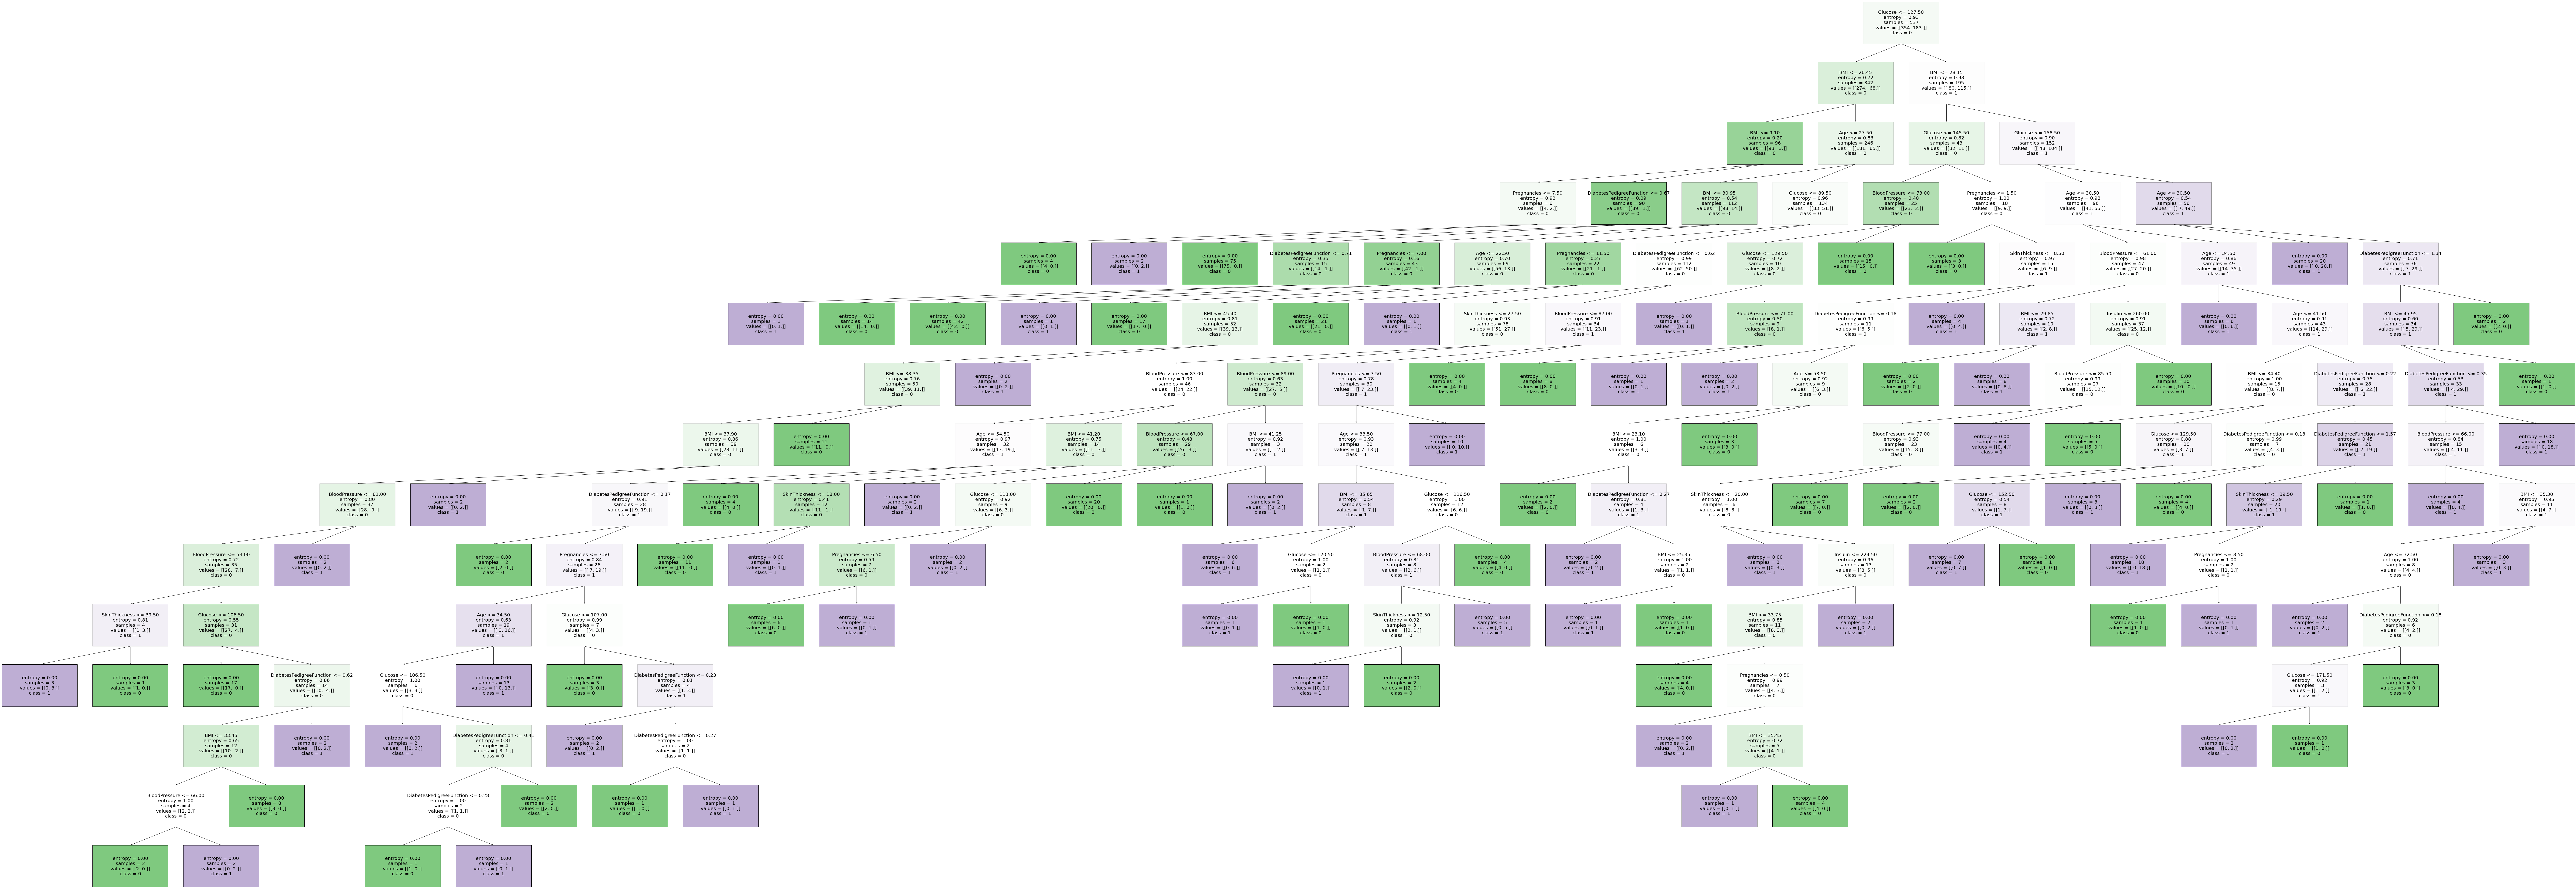

In [38]:
dtree = dtreeplt(
    model = dtmodel,
    feature_names = x_train.columns.values,
    target_names = ['0','1']
)
fig = dtree.view()
fig.savefig('output.png')

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [40]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.696969696969697


In [41]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [42]:
lreg = LogisticRegression()
lregmodel = lreg.fit(x_train,y_train)
lregmodel.coef_
lregmodel.intercept_

array([-7.86829029])

In [43]:
lregmodel.coef_

array([[ 0.10143192,  0.03358643, -0.01571099, -0.00134881, -0.00069745,
         0.08943669,  0.56049167,  0.01705755]])

In [44]:
y_pred = lregmodel.predict(x_test)

In [45]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7835497835497836


In [46]:
dtmodel.feature_importances_

array([0.07831343, 0.25836282, 0.12712038, 0.05727571, 0.02026439,
       0.21814181, 0.12451975, 0.11600171])

In [47]:
x.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [48]:
x.sort_values

<bound method DataFrame.sort_values of      Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  3

In [49]:
dtmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [50]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = { 'max_depth': range(1,10), 'max_features': range(1,10), 'max_leaf_nodes': range(1,10)}
dtclf = DecisionTreeClassifier()
g_search = GridSearchCV(estimator = dtclf, param_grid = param_grid)
g_search.fit(x_train, y_train);
print(g_search.best_params_)

{'max_depth': 4, 'max_features': 4, 'max_leaf_nodes': 6}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
765 fits failed out of a total of 3645.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 316, in fit
    max_leaf_nodes
ValueError: max_leaf_nodes 1 must be either None or larger than 1

---------------

In [59]:
g_search.best_score_

0.7560574593284873